In [1]:
!mkdir credit_samples

A subdirectory or file credit_samples already exists.


In [2]:
import warnings
warnings.filterwarnings('ignore')
import gc
import matplotlib.pyplot as plt

In [3]:
import pandas as pd

### Application table

This is the main table, broken into two files for Train (with TARGET) and Test (without TARGET).
Static data for all applications. One row represents one loan in our data sample.

In [4]:
application_train = pd.read_csv("dataset/application_train.csv")

In [5]:
application_train[["TARGET"]].value_counts()

TARGET
0         282686
1          24825
dtype: int64

In [6]:
application_train.sample()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
86195,200027,0,Cash loans,F,N,Y,2,270000.0,450441.0,48640.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
application_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [8]:
application_train['SK_ID_CURR'].duplicated().any()


False

In [9]:
application_train['SK_ID_CURR'].nunique()

307511

In [10]:
application_sample = application_train.sample(1000, random_state=0)

In [11]:
application_sample.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
42962,149741,1,Cash loans,F,N,N,0,117000.0,417024.0,20191.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
227307,363290,0,Cash loans,M,N,Y,0,450000.0,640080.0,31261.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
290035,436006,0,Revolving loans,M,Y,Y,0,450000.0,900000.0,45000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,2.0,0.0
239833,377703,0,Cash loans,M,Y,N,1,360000.0,1125000.0,33025.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
76427,188624,0,Cash loans,M,Y,Y,0,675000.0,835380.0,42840.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0


In [12]:
application_sample.to_csv("credit_samples/application_train.csv",index=False)

In [13]:
# Target variable (1 - client with payment difficulties: he/she had late payment more than X days
# on at least one of the first Y installments of the loan in our sample,
# 0 - all other cases)
application_sample[["TARGET"]].value_counts()

TARGET
0         913
1          87
dtype: int64

In [14]:
application_sample.corr()['TARGET'].sort_values(ascending=False).head(10)

TARGET                         1.000000
FLAG_DOCUMENT_3                0.104309
DAYS_BIRTH                     0.102888
REG_CITY_NOT_WORK_CITY         0.092384
CNT_FAM_MEMBERS                0.074113
FLAG_EMP_PHONE                 0.072932
LIVE_CITY_NOT_WORK_CITY        0.070352
CNT_CHILDREN                   0.062843
DAYS_LAST_PHONE_CHANGE         0.056069
REGION_RATING_CLIENT_W_CITY    0.054829
Name: TARGET, dtype: float64

In [15]:
application_sample.info(verbose=True,null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 42962 to 130981
Data columns (total 122 columns):
 #    Column                        Non-Null Count  Dtype  
---   ------                        --------------  -----  
 0    SK_ID_CURR                    1000 non-null   int64  
 1    TARGET                        1000 non-null   int64  
 2    NAME_CONTRACT_TYPE            1000 non-null   object 
 3    CODE_GENDER                   1000 non-null   object 
 4    FLAG_OWN_CAR                  1000 non-null   object 
 5    FLAG_OWN_REALTY               1000 non-null   object 
 6    CNT_CHILDREN                  1000 non-null   int64  
 7    AMT_INCOME_TOTAL              1000 non-null   float64
 8    AMT_CREDIT                    1000 non-null   float64
 9    AMT_ANNUITY                   1000 non-null   float64
 10   AMT_GOODS_PRICE               998 non-null    float64
 11   NAME_TYPE_SUITE               995 non-null    object 
 12   NAME_INCOME_TYPE              1000 non-n

In [16]:
columns =  ['OWN_CAR_AGE','OCCUPATION_TYPE','EXT_SOURCE_1','EXT_SOURCE_3','EXT_SOURCE_2','APARTMENTS_AVG','BASEMENTAREA_AVG',
         'YEARS_BEGINEXPLUATATION_AVG','COMMONAREA_AVG','YEARS_BUILD_AVG','ELEVATORS_AVG','ENTRANCES_AVG','FLOORSMAX_AVG',
         'FLOORSMIN_AVG','LANDAREA_AVG','LIVINGAPARTMENTS_AVG','LIVINGAREA_AVG','NONLIVINGAPARTMENTS_AVG','APARTMENTS_MODE',
         'BASEMENTAREA_MODE','YEARS_BEGINEXPLUATATION_MODE','YEARS_BUILD_MODE','COMMONAREA_MODE','ELEVATORS_MODE','ELEVATORS_MODE',
         'ENTRANCES_MODE','FLOORSMAX_MODE','FLOORSMIN_MODE','LANDAREA_MODE','LIVINGAPARTMENTS_MODE','NONLIVINGAREA_MODE',
         'APARTMENTS_MEDI','BASEMENTAREA_MEDI','YEARS_BEGINEXPLUATATION_MEDI','YEARS_BUILD_MEDI','COMMONAREA_MEDI','ELEVATORS_MEDI','ENTRANCES_MEDI',
         'FLOORSMAX_MEDI','FLOORSMIN_MEDI','LANDAREA_MEDI','LIVINGAPARTMENTS_MEDI','NONLIVINGAPARTMENTS_MEDI','NONLIVINGAREA_MEDI','FONDKAPREMONT_MODE',
         'HOUSETYPE_MODE','TOTALAREA_MODE','WALLSMATERIAL_MODE','EMERGENCYSTATE_MODE','AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK',
         'AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR','NONLIVINGAREA_AVG','LIVINGAREA_MODE','LIVINGAREA_MEDI','NONLIVINGAPARTMENTS_MODE']

selected_application_sample = application_sample.drop(columns=columns,axis=1)

In [17]:
selected_application_sample.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
42962,149741,1,Cash loans,F,N,N,0,117000.0,417024.0,20191.5,...,0,0,0,0,0,0,0,0,0,0
227307,363290,0,Cash loans,M,N,Y,0,450000.0,640080.0,31261.5,...,0,0,0,0,0,0,0,0,0,0
290035,436006,0,Revolving loans,M,Y,Y,0,450000.0,900000.0,45000.0,...,0,0,0,0,0,0,0,0,0,0
239833,377703,0,Cash loans,M,Y,N,1,360000.0,1125000.0,33025.5,...,0,0,0,0,0,0,0,0,0,0
76427,188624,0,Cash loans,M,Y,Y,0,675000.0,835380.0,42840.0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
selected_application_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 42962 to 130981
Data columns (total 64 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   SK_ID_CURR                   1000 non-null   int64  
 1   TARGET                       1000 non-null   int64  
 2   NAME_CONTRACT_TYPE           1000 non-null   object 
 3   CODE_GENDER                  1000 non-null   object 
 4   FLAG_OWN_CAR                 1000 non-null   object 
 5   FLAG_OWN_REALTY              1000 non-null   object 
 6   CNT_CHILDREN                 1000 non-null   int64  
 7   AMT_INCOME_TOTAL             1000 non-null   float64
 8   AMT_CREDIT                   1000 non-null   float64
 9   AMT_ANNUITY                  1000 non-null   float64
 10  AMT_GOODS_PRICE              998 non-null    float64
 11  NAME_TYPE_SUITE              995 non-null    object 
 12  NAME_INCOME_TYPE             1000 non-null   object 
 13  NAME_EDUCATI

In [19]:
selected_application_sample.columns[selected_application_sample.isnull().any()]

Index(['AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'OBS_30_CNT_SOCIAL_CIRCLE',
       'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE',
       'DEF_60_CNT_SOCIAL_CIRCLE'],
      dtype='object')

In [20]:
selected_application_sample['AMT_GOODS_PRICE'].fillna(selected_application_sample['AMT_GOODS_PRICE'].median(),inplace=True)

In [21]:
selected_application_sample['NAME_TYPE_SUITE'].value_counts()

Unaccompanied      842
Family             105
Spouse, partner     31
Children            11
Other_B              4
Other_A              2
Name: NAME_TYPE_SUITE, dtype: int64

In [22]:
selected_application_sample['NAME_TYPE_SUITE'].fillna('Unaccompanied',inplace=True)

In [23]:
selected_application_sample[['OBS_30_CNT_SOCIAL_CIRCLE']].head()

,OBS_30_CNT_SOCIAL_CIRCLE
42962,1.0
227307,0.0
290035,NaN
239833,0.0
76427,3.0


In [24]:
selected_application_sample['OBS_30_CNT_SOCIAL_CIRCLE'].fillna(selected_application_sample['OBS_30_CNT_SOCIAL_CIRCLE'].median(),inplace=True)

In [25]:
selected_application_sample['DEF_30_CNT_SOCIAL_CIRCLE'].fillna(selected_application_sample['DEF_30_CNT_SOCIAL_CIRCLE'].median(),inplace=True)

In [26]:
selected_application_sample['OBS_60_CNT_SOCIAL_CIRCLE'].fillna(selected_application_sample['OBS_60_CNT_SOCIAL_CIRCLE'].median(),inplace=True)

In [27]:
selected_application_sample['DEF_60_CNT_SOCIAL_CIRCLE'].fillna(selected_application_sample['DEF_60_CNT_SOCIAL_CIRCLE'].median(),inplace=True)

In [28]:
selected_application_sample.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
42962,149741,1,Cash loans,F,N,N,0,117000.0,417024.0,20191.5,...,0,0,0,0,0,0,0,0,0,0
227307,363290,0,Cash loans,M,N,Y,0,450000.0,640080.0,31261.5,...,0,0,0,0,0,0,0,0,0,0
290035,436006,0,Revolving loans,M,Y,Y,0,450000.0,900000.0,45000.0,...,0,0,0,0,0,0,0,0,0,0
239833,377703,0,Cash loans,M,Y,N,1,360000.0,1125000.0,33025.5,...,0,0,0,0,0,0,0,0,0,0
76427,188624,0,Cash loans,M,Y,Y,0,675000.0,835380.0,42840.0,...,0,0,0,0,0,0,0,0,0,0


##### Feature engineering/extraction

In [29]:
# credit amount ratio relative to the income of a client
selected_application_sample['CREDIT_INCOME_RATIO'] = selected_application_sample['AMT_CREDIT'] / selected_application_sample['AMT_INCOME_TOTAL']
# loan annuity percentage relative to the income of a client
selected_application_sample['ANNUITY_INCOME_RATIO'] = selected_application_sample['AMT_ANNUITY'] / selected_application_sample['AMT_INCOME_TOTAL']
# the length of the payment in months 
selected_application_sample['CREDIT_TERM'] = selected_application_sample['AMT_ANNUITY'] / selected_application_sample['AMT_CREDIT']
# days employed relative to the age of the client
selected_application_sample['DAYS_EMPLOYED_RATIO'] = selected_application_sample['DAYS_EMPLOYED'] / selected_application_sample['DAYS_BIRTH']

In [30]:
# Compare the amount credit given to the clients income
selected_application_sample['INCOME_CREDIT_RATIO'] = selected_application_sample['AMT_CREDIT'] / selected_application_sample['AMT_INCOME_TOTAL']

In [31]:
# Ratio of annuity to amount of income
selected_application_sample['ANNUITY_INCOME_RATIO'] = selected_application_sample['AMT_ANNUITY'] / selected_application_sample['AMT_INCOME_TOTAL']


In [32]:
# Difference betwwen the price of goods and the loan amount given
selected_application_sample['GOODS_PRICE_LOAN_DIFFERENCE'] = selected_application_sample['AMT_GOODS_PRICE'] - selected_application_sample['AMT_CREDIT']

In [33]:
# Rate of payment
selected_application_sample['PAYMENT_RATE'] = selected_application_sample['AMT_ANNUITY'] / selected_application_sample['AMT_CREDIT']


### Bureau table

All client's previous credits provided by other financial institutions that were reported to Credit Bureau (for clients who have a loan in our sample).
For every loan in our sample, there are as many rows as number of credits the client had in Credit Bureau before the application date.

In [34]:
loan_ids = list(application_sample['SK_ID_CURR'])

In [35]:
bureau = pd.read_csv("dataset/bureau.csv")
bureau.sample()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
1593811,137501,5594061,Active,currency 1,-187,0,179.0,NaN,0.0,0,675000.0,413104.5,0.0,0.0,Consumer credit,-31,NaN


In [36]:
bureau_sample = bureau[ bureau['SK_ID_CURR'].isin(loan_ids)]

In [37]:
bureau_sample.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
781,125263,5715463,Active,currency 1,-462,0,273.0,NaN,0.0,0,121131.0,52763.58,0.0,0.0,Consumer credit,-5,24462.0
2593,343161,5717666,Closed,currency 1,-433,0,-254.0,-282.0,NaN,0,42246.0,0.00,NaN,0.0,Consumer credit,-212,NaN
2594,343161,5717667,Active,currency 1,-194,0,1054.0,NaN,NaN,0,67500.0,0.00,0.0,0.0,Credit card,-31,NaN
2595,343161,5717668,Active,currency 1,-211,0,120.0,NaN,NaN,0,230040.0,NaN,NaN,0.0,Consumer credit,-8,NaN
2596,343161,5717669,Active,currency 1,-324,0,771.0,NaN,0.0,0,1339551.0,NaN,NaN,0.0,Car loan,-9,NaN


In [38]:
bureau_sample.to_csv("credit_samples/bureau.csv",index=False)

In [39]:
bureau_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4669 entries, 781 to 1715947
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   SK_ID_CURR              4669 non-null   int64  
 1   SK_ID_BUREAU            4669 non-null   int64  
 2   CREDIT_ACTIVE           4669 non-null   object 
 3   CREDIT_CURRENCY         4669 non-null   object 
 4   DAYS_CREDIT             4669 non-null   int64  
 5   CREDIT_DAY_OVERDUE      4669 non-null   int64  
 6   DAYS_CREDIT_ENDDATE     4379 non-null   float64
 7   DAYS_ENDDATE_FACT       2851 non-null   float64
 8   AMT_CREDIT_MAX_OVERDUE  1625 non-null   float64
 9   CNT_CREDIT_PROLONG      4669 non-null   int64  
 10  AMT_CREDIT_SUM          4669 non-null   float64
 11  AMT_CREDIT_SUM_DEBT     3928 non-null   float64
 12  AMT_CREDIT_SUM_LIMIT    3087 non-null   float64
 13  AMT_CREDIT_SUM_OVERDUE  4669 non-null   float64
 14  CREDIT_TYPE             4669 non-nu

In [40]:
columns = ['AMT_ANNUITY']
selected_bureau_sample = bureau_sample.drop(columns=columns,axis=1)

In [41]:
selected_bureau_sample.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE
781,125263,5715463,Active,currency 1,-462,0,273.0,NaN,0.0,0,121131.0,52763.58,0.0,0.0,Consumer credit,-5
2593,343161,5717666,Closed,currency 1,-433,0,-254.0,-282.0,NaN,0,42246.0,0.00,NaN,0.0,Consumer credit,-212
2594,343161,5717667,Active,currency 1,-194,0,1054.0,NaN,NaN,0,67500.0,0.00,0.0,0.0,Credit card,-31
2595,343161,5717668,Active,currency 1,-211,0,120.0,NaN,NaN,0,230040.0,NaN,NaN,0.0,Consumer credit,-8
2596,343161,5717669,Active,currency 1,-324,0,771.0,NaN,0.0,0,1339551.0,NaN,NaN,0.0,Car loan,-9


### Bureau balance table

Monthly balances of previous credits in Credit Bureau.
This table has one row for each month of history of every previous credit reported to Credit Bureau – i.e the table has (#loans in sample * # of relative previous credits * # of months where we have some history observable for the previous credits) rows.

In [42]:
bureaus = list(bureau_sample['SK_ID_BUREAU'])

In [43]:
bureau_balance = pd.read_csv("dataset/bureau_balance.csv")
bureau_balance.sample()

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
22799916,6661290,-23,C


In [44]:
bureau_balance_sample = bureau_balance[ bureau_balance['SK_ID_BUREAU'].isin(bureaus)]

In [45]:
bureau_balance_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44184 entries, 302550 to 27280905
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   SK_ID_BUREAU    44184 non-null  int64 
 1   MONTHS_BALANCE  44184 non-null  int64 
 2   STATUS          44184 non-null  object
dtypes: int64(2), object(1)
memory usage: 1.3+ MB


In [46]:
bureau_balance_sample.tail()

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
27280901,5090743,-36,0
27280902,5090743,-37,0
27280903,5090743,-38,0
27280904,5090743,-39,0
27280905,5090743,-40,0


In [47]:
bureau_balance_sample.to_csv("credit_samples/bureau_balance.csv",index=False)

### Previous balance mid-level table

In [48]:
previous_balance = selected_bureau_sample.merge(bureau_balance, on='SK_ID_BUREAU')

In [49]:
previous_balance.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,MONTHS_BALANCE,STATUS
0,125263,5715463,Active,currency 1,-462,0,273.0,NaN,0.0,0,121131.0,52763.58,0.0,0.0,Consumer credit,-5,0,C
1,125263,5715463,Active,currency 1,-462,0,273.0,NaN,0.0,0,121131.0,52763.58,0.0,0.0,Consumer credit,-5,-1,C
2,125263,5715463,Active,currency 1,-462,0,273.0,NaN,0.0,0,121131.0,52763.58,0.0,0.0,Consumer credit,-5,-2,C
3,125263,5715463,Active,currency 1,-462,0,273.0,NaN,0.0,0,121131.0,52763.58,0.0,0.0,Consumer credit,-5,-3,C
4,125263,5715463,Active,currency 1,-462,0,273.0,NaN,0.0,0,121131.0,52763.58,0.0,0.0,Consumer credit,-5,-4,C


In [50]:
previous_balance.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44184 entries, 0 to 44183
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   SK_ID_CURR              44184 non-null  int64  
 1   SK_ID_BUREAU            44184 non-null  int64  
 2   CREDIT_ACTIVE           44184 non-null  object 
 3   CREDIT_CURRENCY         44184 non-null  object 
 4   DAYS_CREDIT             44184 non-null  int64  
 5   CREDIT_DAY_OVERDUE      44184 non-null  int64  
 6   DAYS_CREDIT_ENDDATE     41879 non-null  float64
 7   DAYS_ENDDATE_FACT       32780 non-null  float64
 8   AMT_CREDIT_MAX_OVERDUE  12014 non-null  float64
 9   CNT_CREDIT_PROLONG      44184 non-null  int64  
 10  AMT_CREDIT_SUM          44184 non-null  float64
 11  AMT_CREDIT_SUM_DEBT     37262 non-null  float64
 12  AMT_CREDIT_SUM_LIMIT    26958 non-null  float64
 13  AMT_CREDIT_SUM_OVERDUE  44184 non-null  float64
 14  CREDIT_TYPE             44184 non-null

In [51]:
previous_balance.columns[previous_balance.isnull().any()]

Index(['DAYS_CREDIT_ENDDATE', 'DAYS_ENDDATE_FACT', 'AMT_CREDIT_MAX_OVERDUE',
       'AMT_CREDIT_SUM_DEBT', 'AMT_CREDIT_SUM_LIMIT'],
      dtype='object')

In [52]:
previous_balance['DAYS_CREDIT_ENDDATE'].fillna(previous_balance['DAYS_CREDIT_ENDDATE'].median(),inplace=True)
previous_balance['DAYS_ENDDATE_FACT'].fillna(previous_balance['DAYS_ENDDATE_FACT'].median(),inplace=True)
previous_balance['AMT_CREDIT_SUM_DEBT'].fillna(previous_balance['AMT_CREDIT_SUM_DEBT'].median(),inplace=True)
previous_balance['AMT_CREDIT_MAX_OVERDUE'].fillna(previous_balance['AMT_CREDIT_MAX_OVERDUE'].median(),inplace=True)
previous_balance['AMT_CREDIT_SUM_LIMIT'].fillna(previous_balance['AMT_CREDIT_SUM_LIMIT'].median(),inplace=True)

In [53]:
previous_balance.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44184 entries, 0 to 44183
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   SK_ID_CURR              44184 non-null  int64  
 1   SK_ID_BUREAU            44184 non-null  int64  
 2   CREDIT_ACTIVE           44184 non-null  object 
 3   CREDIT_CURRENCY         44184 non-null  object 
 4   DAYS_CREDIT             44184 non-null  int64  
 5   CREDIT_DAY_OVERDUE      44184 non-null  int64  
 6   DAYS_CREDIT_ENDDATE     44184 non-null  float64
 7   DAYS_ENDDATE_FACT       44184 non-null  float64
 8   AMT_CREDIT_MAX_OVERDUE  44184 non-null  float64
 9   CNT_CREDIT_PROLONG      44184 non-null  int64  
 10  AMT_CREDIT_SUM          44184 non-null  float64
 11  AMT_CREDIT_SUM_DEBT     44184 non-null  float64
 12  AMT_CREDIT_SUM_LIMIT    44184 non-null  float64
 13  AMT_CREDIT_SUM_OVERDUE  44184 non-null  float64
 14  CREDIT_TYPE             44184 non-null

In [54]:
previous_balance.sample(5)

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,MONTHS_BALANCE,STATUS
27803,345371,6743110,Closed,currency 1,-1606,0,-1241.0,-1241.0,0.0,0,102798.0,0.0,0.0,0.0,Consumer credit,-1241,-11,C
27423,118178,6425355,Closed,currency 1,-1765,0,-1398.0,-1216.0,0.0,0,90000.0,0.0,0.0,0.0,Consumer credit,-1216,-1,0
32765,388563,5424460,Active,currency 1,-1424,0,980.0,-1134.0,0.0,0,585000.0,0.0,0.0,0.0,Credit card,-16,-26,C
31201,178379,6127909,Closed,currency 1,-1525,0,-1369.0,-1369.0,0.0,0,13500.0,0.0,0.0,0.0,Credit card,-864,-47,0
11969,215108,5976363,Closed,currency 1,-2342,0,-516.0,-1225.0,0.0,0,382500.0,0.0,0.0,0.0,Consumer credit,-679,-34,C


#### Feature engineering / extraction


In [55]:
previous_balance[['AMT_CREDIT_SUM_LIMIT']].describe()

,AMT_CREDIT_SUM_LIMIT
count,44184.000000
mean,2327.181150
std,23550.938267
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,483623.640000


In [56]:
def credit_sum_limit(credit_limit):
  if credit_limit > 0:
    limit_above_zero = 1
  else:
    limit_above_zero = 0
  return limit_above_zero

In [57]:
previous_balance['CREDIT_LIMIT_ABOVE_ZERO'] = previous_balance['AMT_CREDIT_SUM_LIMIT'].apply(credit_sum_limit)

In [58]:
previous_balance['CREDIT_LIMIT_ABOVE_ZERO'].value_counts()

0    43120
1     1064
Name: CREDIT_LIMIT_ABOVE_ZERO, dtype: int64

In [59]:
previous_balance[['AMT_CREDIT_SUM_DEBT']].describe()

,AMT_CREDIT_SUM_DEBT
count,4.418400e+04
mean,7.295952e+04
std,3.859817e+05
min,-2.140650e+02
25%,0.000000e+00
50%,0.000000e+00
75%,0.000000e+00
max,6.773630e+06


In [60]:
def has_debt(debt_amount):
  if debt_amount > 0:
    has_debt = 1
  else:
    has_debt = 0
  return has_debt

In [61]:
previous_balance["HAS_DEBT"] = previous_balance['AMT_CREDIT_SUM_DEBT'].apply(has_debt)

In [62]:
previous_balance['AMT_CREDIT_SUM_OVERDUE'].describe()

count    44184.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: AMT_CREDIT_SUM_OVERDUE, dtype: float64

In [63]:
def over_due_debt(debt_amount):
  if debt_amount > 0:
    debt_overdue = 1
  else:
    debt_overdue = 0
  return debt_overdue

In [64]:
previous_balance['HAS_OVERDUE_DEBT'] = previous_balance['AMT_CREDIT_SUM_OVERDUE'].apply(over_due_debt)

In [65]:
previous_balance['HAS_OVERDUE_DEBT'].value_counts()

0    44184
Name: HAS_OVERDUE_DEBT, dtype: int64

### Credit card balance table

Monthly balance snapshots of previous credit cards that the applicant has with Home Credit.
This table has one row for each month of history of every previous credit in Home Credit (consumer credit and cash loans) related to loans in our sample – i.e. the table has (#loans in sample * # of relative previous credit cards * # of months where we have some history observable for the previous credit card) rows.

In [66]:
credit_card_balance = pd.read_csv("dataset/credit_card_balance.csv")
credit_card_balance.sample()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
1985434,2321462,440943,-67,126900.855,135000,0.0,0.0,0.0,0.0,6750.0,...,126900.855,126900.855,0.0,0,0.0,0.0,22.0,Active,0,0


In [67]:
credit_card_balance_sample = credit_card_balance[ credit_card_balance['SK_ID_CURR'].isin(loan_ids)]
credit_card_balance_sample.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
69,1079749,140209,-3,0.000,112500,0.0,0.00,0.0,0.00,0.000,...,0.000,0.000,0.0,0,0.0,0.0,35.0,Completed,0,0
249,2618924,402569,-3,0.000,585000,NaN,0.00,NaN,NaN,0.000,...,0.000,0.000,NaN,0,NaN,NaN,0.0,Active,0,0
1633,2085792,320246,-4,68894.280,225000,22500.0,43518.15,0.0,21018.15,5036.805,...,68894.280,68894.280,1.0,8,0.0,7.0,24.0,Active,0,0
2738,2660051,215359,-1,419407.290,450000,0.0,21352.50,0.0,21352.50,21637.170,...,419407.290,419407.290,0.0,1,0.0,1.0,22.0,Active,0,0
2831,2421436,302817,-4,180803.295,180000,0.0,0.00,0.0,0.00,9356.805,...,180803.295,180803.295,0.0,0,0.0,0.0,14.0,Active,0,0


In [68]:
credit_card_balance_sample.to_csv("credit_samples/credit_card_balance.csv",index=False)

In [69]:
credit_card_balance_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11038 entries, 69 to 3840267
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   SK_ID_PREV                  11038 non-null  int64  
 1   SK_ID_CURR                  11038 non-null  int64  
 2   MONTHS_BALANCE              11038 non-null  int64  
 3   AMT_BALANCE                 11038 non-null  float64
 4   AMT_CREDIT_LIMIT_ACTUAL     11038 non-null  int64  
 5   AMT_DRAWINGS_ATM_CURRENT    9015 non-null   float64
 6   AMT_DRAWINGS_CURRENT        11038 non-null  float64
 7   AMT_DRAWINGS_OTHER_CURRENT  9015 non-null   float64
 8   AMT_DRAWINGS_POS_CURRENT    9015 non-null   float64
 9   AMT_INST_MIN_REGULARITY     10032 non-null  float64
 10  AMT_PAYMENT_CURRENT         9029 non-null   float64
 11  AMT_PAYMENT_TOTAL_CURRENT   11038 non-null  float64
 12  AMT_RECEIVABLE_PRINCIPAL    11038 non-null  float64
 13  AMT_RECIVABLE               

In [70]:
credit_card_balance_sample.columns[credit_card_balance_sample.isnull().any()]

Index(['AMT_DRAWINGS_ATM_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT',
       'AMT_DRAWINGS_POS_CURRENT', 'AMT_INST_MIN_REGULARITY',
       'AMT_PAYMENT_CURRENT', 'CNT_DRAWINGS_ATM_CURRENT',
       'CNT_DRAWINGS_OTHER_CURRENT', 'CNT_DRAWINGS_POS_CURRENT',
       'CNT_INSTALMENT_MATURE_CUM'],
      dtype='object')

In [71]:
credit_card_balance_sample['AMT_DRAWINGS_ATM_CURRENT'].fillna(credit_card_balance_sample['AMT_DRAWINGS_ATM_CURRENT'].median(),inplace=True)
credit_card_balance_sample['AMT_DRAWINGS_POS_CURRENT'].fillna(credit_card_balance_sample['AMT_DRAWINGS_POS_CURRENT'].median(),inplace=True)
credit_card_balance_sample['AMT_DRAWINGS_POS_CURRENT'].fillna(credit_card_balance_sample['AMT_DRAWINGS_POS_CURRENT'].median(),inplace=True)
credit_card_balance_sample['AMT_INST_MIN_REGULARITY'].fillna(credit_card_balance_sample['AMT_INST_MIN_REGULARITY'].median(),inplace=True)
credit_card_balance_sample['AMT_PAYMENT_CURRENT'].fillna(credit_card_balance_sample['AMT_PAYMENT_CURRENT'].median(),inplace=True)
credit_card_balance_sample['CNT_DRAWINGS_ATM_CURRENT'].fillna(credit_card_balance_sample['CNT_DRAWINGS_ATM_CURRENT'].median(),inplace=True)
credit_card_balance_sample['CNT_DRAWINGS_OTHER_CURRENT'].fillna(credit_card_balance_sample['CNT_DRAWINGS_OTHER_CURRENT'].median(),inplace=True)
credit_card_balance_sample['CNT_DRAWINGS_POS_CURRENT'].fillna(credit_card_balance_sample['CNT_DRAWINGS_POS_CURRENT'].median(),inplace=True)
credit_card_balance_sample['CNT_INSTALMENT_MATURE_CUM'].fillna(credit_card_balance_sample['CNT_INSTALMENT_MATURE_CUM'].median(),inplace=True)
credit_card_balance_sample['AMT_DRAWINGS_OTHER_CURRENT'].fillna(credit_card_balance_sample['AMT_DRAWINGS_OTHER_CURRENT'].median(),inplace=True)


In [72]:
credit_card_balance_sample.rename(columns={"MONTHS_BALANCE": "CREDIT_MONTHS_BALANCE",
                                           "NAME_CONTRACT_STATUS":"CREDIT_NAME_CONTRACT_STATUS",
                                           "SK_DPD":"CREDIT_SK_DPD",
                                           "SK_DPD_DEF":"CURRENT_SK_DPD_DEF",
                                           },inplace=True)

#### Feature engineering / extraction

In [73]:
credit_card_balance_sample.head()

,SK_ID_PREV,SK_ID_CURR,CREDIT_MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,CREDIT_NAME_CONTRACT_STATUS,CREDIT_SK_DPD,CURRENT_SK_DPD_DEF
69,1079749,140209,-3,0.000,112500,0.0,0.00,0.0,0.00,0.000,...,0.000,0.000,0.0,0,0.0,0.0,35.0,Completed,0,0
249,2618924,402569,-3,0.000,585000,0.0,0.00,0.0,0.00,0.000,...,0.000,0.000,0.0,0,0.0,0.0,0.0,Active,0,0
1633,2085792,320246,-4,68894.280,225000,22500.0,43518.15,0.0,21018.15,5036.805,...,68894.280,68894.280,1.0,8,0.0,7.0,24.0,Active,0,0
2738,2660051,215359,-1,419407.290,450000,0.0,21352.50,0.0,21352.50,21637.170,...,419407.290,419407.290,0.0,1,0.0,1.0,22.0,Active,0,0
2831,2421436,302817,-4,180803.295,180000,0.0,0.00,0.0,0.00,9356.805,...,180803.295,180803.295,0.0,0,0.0,0.0,14.0,Active,0,0


In [74]:
# Difference between credit card limit and the balance 
credit_card_balance_sample['BALANCE_LIMIT_DIFF'] = credit_card_balance_sample['AMT_BALANCE'] - credit_card_balance_sample['AMT_CREDIT_LIMIT_ACTUAL']

In [75]:
credit_card_balance_sample[['BALANCE_LIMIT_DIFF']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11038 entries, 69 to 3840267
Data columns (total 1 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   BALANCE_LIMIT_DIFF  11038 non-null  float64
dtypes: float64(1)
memory usage: 172.5 KB


In [76]:
credit_card_balance_sample[['AMT_PAYMENT_TOTAL_CURRENT']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11038 entries, 69 to 3840267
Data columns (total 1 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   AMT_PAYMENT_TOTAL_CURRENT  11038 non-null  float64
dtypes: float64(1)
memory usage: 172.5 KB


In [77]:
credit_card_balance_sample[['AMT_TOTAL_RECEIVABLE']].describe()

,AMT_TOTAL_RECEIVABLE
count,11038.000000
mean,60988.620560
std,107552.566491
min,-20810.160000
25%,0.000000
50%,0.000000
75%,92552.321250
max,942093.180000


In [78]:
# Difference between client's total credit monthly payments and the total monthly receivable 
credit_card_balance_sample['CREDIT_RECEIVABLE_DIFF'] = credit_card_balance_sample['AMT_TOTAL_RECEIVABLE'] - credit_card_balance_sample['AMT_PAYMENT_TOTAL_CURRENT'] 

In [79]:
credit_card_balance_sample[['AMT_PAYMENT_TOTAL_CURRENT']].describe()

,AMT_PAYMENT_TOTAL_CURRENT
count,11038.000000
mean,7554.972899
std,27517.188795
min,0.000000
25%,0.000000
50%,0.000000
75%,9000.000000
max,974488.410000


In [80]:
credit_card_balance_sample[['CREDIT_RECEIVABLE_DIFF']].describe()

,CREDIT_RECEIVABLE_DIFF
count,11038.000000
mean,53433.647661
std,105863.232905
min,-974488.410000
25%,0.000000
50%,0.000000
75%,84853.417500
max,916678.980000


In [81]:
# Total drawings
credit_card_balance_sample['TOTAL_DRAWINGS'] = credit_card_balance_sample['AMT_DRAWINGS_ATM_CURRENT'] + credit_card_balance_sample['AMT_DRAWINGS_CURRENT'] + credit_card_balance_sample['AMT_DRAWINGS_OTHER_CURRENT'] + credit_card_balance_sample['AMT_DRAWINGS_POS_CURRENT']

In [82]:
credit_card_balance_sample['TOTAL_DRAWINGS'].describe()

count    1.103800e+04
mean     1.519424e+04
std      6.194197e+04
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.516113e+06
Name: TOTAL_DRAWINGS, dtype: float64

In [83]:
credit_card_balance_sample.head()

,SK_ID_PREV,SK_ID_CURR,CREDIT_MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,CREDIT_NAME_CONTRACT_STATUS,CREDIT_SK_DPD,CURRENT_SK_DPD_DEF,BALANCE_LIMIT_DIFF,CREDIT_RECEIVABLE_DIFF,TOTAL_DRAWINGS
69,1079749,140209,-3,0.000,112500,0.0,0.00,0.0,0.00,0.000,...,0,0.0,0.0,35.0,Completed,0,0,-112500.000,0.000,0.0
249,2618924,402569,-3,0.000,585000,0.0,0.00,0.0,0.00,0.000,...,0,0.0,0.0,0.0,Active,0,0,-585000.000,0.000,0.0
1633,2085792,320246,-4,68894.280,225000,22500.0,43518.15,0.0,21018.15,5036.805,...,8,0.0,7.0,24.0,Active,0,0,-156105.720,40994.280,87036.3
2738,2660051,215359,-1,419407.290,450000,0.0,21352.50,0.0,21352.50,21637.170,...,1,0.0,1.0,22.0,Active,0,0,-30592.710,396907.290,42705.0
2831,2421436,302817,-4,180803.295,180000,0.0,0.00,0.0,0.00,9356.805,...,0,0.0,0.0,14.0,Active,0,0,803.295,180691.425,0.0


### POS cash balance table

Monthly balance snapshots of previous POS (point of sales) and cash loans that the applicant had with Home Credit.
This table has one row for each month of history of every previous credit in Home Credit (consumer credit and cash loans) related to loans in our sample – i.e. the table has (#loans in sample * # of relative previous credits * # of months in which we have some history observable for the previous credits) rows

In [84]:
POS_CASH_balance = pd.read_csv("dataset/POS_CASH_balance.csv")
POS_CASH_balance.sample()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
8861600,1035152,198257,-67,6.0,3.0,Active,0,0


In [85]:
POS_CASH_balance_sample = POS_CASH_balance[ POS_CASH_balance['SK_ID_CURR'].isin(loan_ids)]
POS_CASH_balance_sample.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
889,2248795,376784,-16,8.0,4.0,Active,0,0
1186,1886745,195453,-32,12.0,11.0,Active,0,0
2262,1194898,256827,-33,24.0,10.0,Active,0,0
2654,2665870,346581,-39,24.0,11.0,Active,0,0
2802,1773252,447152,-14,24.0,17.0,Active,0,0


In [86]:
POS_CASH_balance_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27493 entries, 889 to 9998422
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   SK_ID_PREV             27493 non-null  int64  
 1   SK_ID_CURR             27493 non-null  int64  
 2   MONTHS_BALANCE         27493 non-null  int64  
 3   CNT_INSTALMENT         27422 non-null  float64
 4   CNT_INSTALMENT_FUTURE  27422 non-null  float64
 5   NAME_CONTRACT_STATUS   27493 non-null  object 
 6   SK_DPD                 27493 non-null  int64  
 7   SK_DPD_DEF             27493 non-null  int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 1.9+ MB


In [87]:
POS_CASH_balance_sample.to_csv("credit_samples/POS_CASH_balance.csv",index=False)

In [88]:
POS_CASH_balance_sample.columns[POS_CASH_balance_sample.isnull().any()]

Index(['CNT_INSTALMENT', 'CNT_INSTALMENT_FUTURE'], dtype='object')

In [89]:
POS_CASH_balance_sample['CNT_INSTALMENT'].fillna(POS_CASH_balance_sample['CNT_INSTALMENT'].median(),inplace=True)
POS_CASH_balance_sample['CNT_INSTALMENT_FUTURE'].fillna(POS_CASH_balance_sample['CNT_INSTALMENT_FUTURE'].median(),inplace=True)

#### Feature engineering / extraction

In [90]:
POS_CASH_balance_sample.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
889,2248795,376784,-16,8.0,4.0,Active,0,0
1186,1886745,195453,-32,12.0,11.0,Active,0,0
2262,1194898,256827,-33,24.0,10.0,Active,0,0
2654,2665870,346581,-39,24.0,11.0,Active,0,0
2802,1773252,447152,-14,24.0,17.0,Active,0,0


### Installments payments table

Repayment history for the previously disbursed credits in Home Credit related to the loans in our sample.
There is a) one row for every payment that was made plus b) one row each for missed payment.
One row is equivalent to one payment of one installment OR one installment corresponding to one payment of one previous Home Credit credit related to loans in our sample.

In [91]:
installments_payments = pd.read_csv("dataset/installments_payments.csv")
installments_payments.sample()

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
12962028,2382206,446174,2.0,4,-277.0,-294.0,255971.475,255971.475


In [92]:
installments_payments_sample = installments_payments[ installments_payments['SK_ID_CURR'].isin(loan_ids)]
installments_payments_sample.head()

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
568,1096168,165559,1.0,9,-2061.0,-2094.0,6942.465,6.210
636,1188985,118178,0.0,103,-730.0,-730.0,450.000,450.000
659,2106634,111236,1.0,2,-395.0,-398.0,17841.870,17841.870
683,1084813,101396,1.0,1,-1892.0,-1908.0,4596.615,4596.615
1579,1596001,122119,0.0,26,-1647.0,-1677.0,1102.950,991.755


In [93]:
installments_payments_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38946 entries, 568 to 13605233
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   SK_ID_PREV              38946 non-null  int64  
 1   SK_ID_CURR              38946 non-null  int64  
 2   NUM_INSTALMENT_VERSION  38946 non-null  float64
 3   NUM_INSTALMENT_NUMBER   38946 non-null  int64  
 4   DAYS_INSTALMENT         38946 non-null  float64
 5   DAYS_ENTRY_PAYMENT      38939 non-null  float64
 6   AMT_INSTALMENT          38946 non-null  float64
 7   AMT_PAYMENT             38939 non-null  float64
dtypes: float64(5), int64(3)
memory usage: 2.7 MB


In [94]:
installments_payments_sample.to_csv("credit_samples/installments_payments.csv",index=False)

In [95]:
installments_payments_sample.columns[installments_payments_sample.isnull().any()]

Index(['DAYS_ENTRY_PAYMENT', 'AMT_PAYMENT'], dtype='object')

In [96]:
installments_payments_sample['DAYS_ENTRY_PAYMENT'].fillna(installments_payments_sample['DAYS_ENTRY_PAYMENT'].median(),inplace=True)
installments_payments_sample['AMT_PAYMENT'].fillna(installments_payments_sample['AMT_PAYMENT'].median(),inplace=True)


#### Feature engineering / extraction

In [97]:
installments_payments_sample.head()

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
568,1096168,165559,1.0,9,-2061.0,-2094.0,6942.465,6.210
636,1188985,118178,0.0,103,-730.0,-730.0,450.000,450.000
659,2106634,111236,1.0,2,-395.0,-398.0,17841.870,17841.870
683,1084813,101396,1.0,1,-1892.0,-1908.0,4596.615,4596.615
1579,1596001,122119,0.0,26,-1647.0,-1677.0,1102.950,991.755


In [98]:
# Ratio of installment amount and actual paid amount 
installments_payments_sample['INSTALMENT_PAYMENT_RATIO'] =  installments_payments_sample['AMT_PAYMENT'] / installments_payments_sample['AMT_INSTALMENT']

In [99]:
installments_payments_sample['INSTALMENT_PAYMENT_RATIO'].describe()

count    38946.000000
mean         1.079223
std          7.317237
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max       1163.187500
Name: INSTALMENT_PAYMENT_RATIO, dtype: float64

In [100]:
installments_payments_sample[['INSTALMENT_PAYMENT_RATIO']]

,INSTALMENT_PAYMENT_RATIO
568,0.000894
636,1.000000
659,1.000000
683,1.000000
1579,0.899184
...,...
13603657,1.000000
13603785,1.000000
13604054,1.000000
13604142,1.000000


### Previous application table

All previous applications for Home Credit loans of clients who have loans in our sample.
There is one row for each previous application related to loans in our data sample.

In [101]:
previous_application = pd.read_csv("dataset\previous_application.csv")
previous_application.sample()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
886101,1225855,122662,Cash loans,NaN,0.0,0.0,NaN,NaN,MONDAY,11,...,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN


In [102]:
previous_application_sample = previous_application[ previous_application['SK_ID_CURR'].isin(loan_ids)]
previous_application_sample.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
531,1601305,328893,Cash loans,NaN,0.0,0.0,NaN,NaN,FRIDAY,10,...,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN
647,1974840,133739,Consumer loans,5654.745,37620.0,40932.0,0.0,37620.0,SATURDAY,15,...,Connectivity,10.0,high,POS mobile with interest,365243.0,-535.0,-265.0,-355.0,-349.0,0.0
762,2360644,299809,Consumer loans,7005.690,46071.0,44172.0,4635.0,46071.0,WEDNESDAY,12,...,Connectivity,8.0,low_normal,POS mobile with interest,365243.0,-2697.0,-2487.0,-2487.0,-2479.0,1.0
934,1798886,259576,Consumer loans,24129.360,139522.5,131782.5,13954.5,139522.5,WEDNESDAY,12,...,Furniture,6.0,middle,POS industry with interest,365243.0,-2499.0,-2349.0,-2349.0,-2023.0,1.0
1659,1048905,178056,Revolving loans,NaN,0.0,0.0,NaN,NaN,WEDNESDAY,14,...,XNA,NaN,XNA,Card Street,NaN,NaN,NaN,NaN,NaN,NaN


In [103]:
previous_application_sample.to_csv("credit_samples/previous_application.csv",index=False)

In [104]:
previous_application_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4693 entries, 531 to 1670197
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   SK_ID_PREV                   4693 non-null   int64  
 1   SK_ID_CURR                   4693 non-null   int64  
 2   NAME_CONTRACT_TYPE           4693 non-null   object 
 3   AMT_ANNUITY                  3648 non-null   float64
 4   AMT_APPLICATION              4693 non-null   float64
 5   AMT_CREDIT                   4693 non-null   float64
 6   AMT_DOWN_PAYMENT             2150 non-null   float64
 7   AMT_GOODS_PRICE              3595 non-null   float64
 8   WEEKDAY_APPR_PROCESS_START   4693 non-null   object 
 9   HOUR_APPR_PROCESS_START      4693 non-null   int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  4693 non-null   object 
 11  NFLAG_LAST_APPL_IN_DAY       4693 non-null   int64  
 12  RATE_DOWN_PAYMENT            2150 non-null   float64
 13  RATE_INTEREST

In [105]:
columns = ['AMT_DOWN_PAYMENT','RATE_DOWN_PAYMENT','RATE_INTEREST_PRIMARY','RATE_INTEREST_PRIVILEGED','DAYS_FIRST_DRAWING','DAYS_FIRST_DUE',
           'DAYS_LAST_DUE_1ST_VERSION','DAYS_LAST_DUE','DAYS_TERMINATION','NFLAG_INSURED_ON_APPROVAL']
selected_previous_application_sample = previous_application_sample.drop(columns=columns, axis=1)
selected_previous_application_sample.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,...,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
531,1601305,328893,Cash loans,NaN,0.0,0.0,NaN,FRIDAY,10,Y,...,Refreshed,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash
647,1974840,133739,Consumer loans,5654.745,37620.0,40932.0,37620.0,SATURDAY,15,Y,...,New,Mobile,POS,XNA,Country-wide,10,Connectivity,10.0,high,POS mobile with interest
762,2360644,299809,Consumer loans,7005.690,46071.0,44172.0,46071.0,WEDNESDAY,12,Y,...,Repeater,Mobile,POS,XNA,Country-wide,40,Connectivity,8.0,low_normal,POS mobile with interest
934,1798886,259576,Consumer loans,24129.360,139522.5,131782.5,139522.5,WEDNESDAY,12,Y,...,New,Furniture,POS,XNA,Stone,800,Furniture,6.0,middle,POS industry with interest
1659,1048905,178056,Revolving loans,NaN,0.0,0.0,NaN,WEDNESDAY,14,Y,...,Repeater,XNA,XNA,XNA,Credit and cash offices,0,XNA,NaN,XNA,Card Street


In [106]:
selected_previous_application_sample.columns[selected_previous_application_sample.isnull().any()]

Index(['AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'CNT_PAYMENT',
       'PRODUCT_COMBINATION'],
      dtype='object')

In [107]:
selected_previous_application_sample['AMT_ANNUITY'].fillna(selected_previous_application_sample['AMT_ANNUITY'].median(),inplace=True)
selected_previous_application_sample['CNT_PAYMENT'].fillna(selected_previous_application_sample['CNT_PAYMENT'].median(),inplace=True)

selected_previous_application_sample['AMT_GOODS_PRICE'].fillna(selected_previous_application_sample['AMT_GOODS_PRICE'].median(),inplace=True)


In [108]:
selected_previous_application_sample['NAME_TYPE_SUITE'].value_counts()

Unaccompanied      1412
Family              616
Spouse, partner     178
Children             82
Other_B              63
Other_A              28
Group of people       6
Name: NAME_TYPE_SUITE, dtype: int64

In [109]:
selected_previous_application_sample['NAME_TYPE_SUITE'].fillna('Unaccompanied',inplace=True)


In [110]:
selected_previous_application_sample['PRODUCT_COMBINATION'].value_counts()

Cash                              797
POS household with interest       757
POS mobile with interest          588
Cash X-Sell: middle               371
Card Street                       350
Cash X-Sell: low                  332
POS industry with interest        241
POS household without interest    233
Card X-Sell                       214
Cash X-Sell: high                 189
Cash Street: high                 173
Cash Street: middle               125
Cash Street: low                  123
POS other with interest            86
POS mobile without interest        65
POS industry without interest      41
POS others without interest         7
Name: PRODUCT_COMBINATION, dtype: int64

In [111]:
selected_previous_application_sample['PRODUCT_COMBINATION'].fillna('Cash',inplace=True)

#### Feature engineering / extraction

In [112]:
selected_previous_application_sample.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,...,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
531,1601305,328893,Cash loans,11250.000,0.0,0.0,112855.5,FRIDAY,10,Y,...,Refreshed,XNA,XNA,XNA,Credit and cash offices,-1,XNA,12.0,XNA,Cash
647,1974840,133739,Consumer loans,5654.745,37620.0,40932.0,37620.0,SATURDAY,15,Y,...,New,Mobile,POS,XNA,Country-wide,10,Connectivity,10.0,high,POS mobile with interest
762,2360644,299809,Consumer loans,7005.690,46071.0,44172.0,46071.0,WEDNESDAY,12,Y,...,Repeater,Mobile,POS,XNA,Country-wide,40,Connectivity,8.0,low_normal,POS mobile with interest
934,1798886,259576,Consumer loans,24129.360,139522.5,131782.5,139522.5,WEDNESDAY,12,Y,...,New,Furniture,POS,XNA,Stone,800,Furniture,6.0,middle,POS industry with interest
1659,1048905,178056,Revolving loans,11250.000,0.0,0.0,112855.5,WEDNESDAY,14,Y,...,Repeater,XNA,XNA,XNA,Credit and cash offices,0,XNA,12.0,XNA,Card Street


In [113]:
# Difference between the amount the client applied for and the awarded amount 
selected_previous_application_sample['APPLIED_AWARDED_AMOUNT_DIFF'] = selected_previous_application_sample["AMT_CREDIT"] - selected_previous_application_sample["AMT_APPLICATION"]

In [114]:
selected_previous_application_sample['APPLIED_AWARDED_AMOUNT_DIFF'].describe()

count      4693.000000
mean      21098.551624
std       64792.723984
min     -472500.000000
25%           0.000000
50%           0.000000
75%       14850.000000
max      900000.000000
Name: APPLIED_AWARDED_AMOUNT_DIFF, dtype: float64

In [115]:
# Difference between the price of goods and the loan amount the client applied for
selected_previous_application_sample['GOODS_PRICE_APPLIED_DIFF'] = selected_previous_application_sample["AMT_GOODS_PRICE"] - selected_previous_application_sample["AMT_APPLICATION"]

In [116]:
selected_previous_application_sample['GOODS_PRICE_APPLIED_DIFF'].describe()

count      4693.000000
mean      26481.001278
std       47983.511060
min      -45000.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      270000.000000
Name: GOODS_PRICE_APPLIED_DIFF, dtype: float64

In [117]:
application_sample["NAME_TYPE_SUITE"].value_counts()

Unaccompanied      842
Family             105
Spouse, partner     31
Children            11
Other_B              4
Other_A              2
Name: NAME_TYPE_SUITE, dtype: int64

### Project Formulation



Objective: Predict whether an applicant will be able to repay a loan.

Target: 1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample, 0 - all other cases

Features: Application features, previous application features, bureau features, installment features, credit balance features, and POS cash balance features. 

### Join tables 
installments_payments_sample

POS_CASH_balance_sample

selected_previous_application_sample

credit_card_balance_sample

selected_application_sample

previous_balance

In [118]:
installments_payments_sample.sample()

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT,INSTALMENT_PAYMENT_RATIO
4986252,2440186,287436,1.0,6,-1383.0,-1386.0,16841.475,16841.475,1.0


In [119]:
selected_previous_application_sample.sample()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,...,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,APPLIED_AWARDED_AMOUNT_DIFF,GOODS_PRICE_APPLIED_DIFF
540175,2510726,223220,Revolving loans,16875.0,337500.0,337500.0,337500.0,WEDNESDAY,14,Y,...,Cards,walk-in,Credit and cash offices,-1,XNA,0.0,XNA,Card Street,0.0,0.0


In [120]:
POS_CASH_balance_sample.sample()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
5620028,1581792,231823,-49,7.0,2.0,Active,0,0


In [121]:
credit_card_balance_sample.sample()

,SK_ID_PREV,SK_ID_CURR,CREDIT_MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,CREDIT_NAME_CONTRACT_STATUS,CREDIT_SK_DPD,CURRENT_SK_DPD_DEF,BALANCE_LIMIT_DIFF,CREDIT_RECEIVABLE_DIFF,TOTAL_DRAWINGS
2624001,2560662,117061,-25,451600.74,450000,9000.0,9000.0,0.0,0.0,22646.61,...,1,0.0,0.0,5.0,Active,0,0,1600.74,427305.24,18000.0


In [122]:
previous_balance.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,...,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,MONTHS_BALANCE,STATUS,CREDIT_LIMIT_ABOVE_ZERO,HAS_DEBT,HAS_OVERDUE_DEBT
0,125263,5715463,Active,currency 1,-462,0,273.0,-1134.0,0.0,0,...,52763.58,0.0,0.0,Consumer credit,-5,0,C,0,1,0
1,125263,5715463,Active,currency 1,-462,0,273.0,-1134.0,0.0,0,...,52763.58,0.0,0.0,Consumer credit,-5,-1,C,0,1,0
2,125263,5715463,Active,currency 1,-462,0,273.0,-1134.0,0.0,0,...,52763.58,0.0,0.0,Consumer credit,-5,-2,C,0,1,0
3,125263,5715463,Active,currency 1,-462,0,273.0,-1134.0,0.0,0,...,52763.58,0.0,0.0,Consumer credit,-5,-3,C,0,1,0
4,125263,5715463,Active,currency 1,-462,0,273.0,-1134.0,0.0,0,...,52763.58,0.0,0.0,Consumer credit,-5,-4,C,0,1,0


In [123]:
credit_card_balance_sample.merge(previous_balance,on="SK_ID_CURR")

,SK_ID_PREV,SK_ID_CURR,CREDIT_MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,MONTHS_BALANCE,STATUS,CREDIT_LIMIT_ABOVE_ZERO,HAS_DEBT,HAS_OVERDUE_DEBT
0,2618924,402569,-3,0.0,585000,0.0,0.0,0.0,0.0,0.0,...,1085931.0,0.0,0.0,Mortgage,-711,-39,C,0,1,0
1,2618924,402569,-3,0.0,585000,0.0,0.0,0.0,0.0,0.0,...,1085931.0,0.0,0.0,Mortgage,-711,-40,C,0,1,0
2,2618924,402569,-3,0.0,585000,0.0,0.0,0.0,0.0,0.0,...,1085931.0,0.0,0.0,Mortgage,-711,-41,C,0,1,0
3,2618924,402569,-3,0.0,585000,0.0,0.0,0.0,0.0,0.0,...,1085931.0,0.0,0.0,Mortgage,-711,-42,C,0,1,0
4,2618924,402569,-3,0.0,585000,0.0,0.0,0.0,0.0,0.0,...,1085931.0,0.0,0.0,Mortgage,-711,-43,C,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
794844,1659845,349106,-8,0.0,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,Credit card,-1010,-72,X,0,0,0
794845,1659845,349106,-8,0.0,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,Credit card,-1010,-73,X,0,0,0
794846,1659845,349106,-8,0.0,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,Credit card,-1010,-74,X,0,0,0
794847,1659845,349106,-8,0.0,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,Credit card,-1010,-75,X,0,0,0


In [124]:
dff = installments_payments_sample.merge(selected_previous_application_sample, on=['SK_ID_PREV','SK_ID_CURR']).\
                             merge(POS_CASH_balance_sample, on=['SK_ID_PREV','SK_ID_CURR']).\
                             merge(selected_application_sample,on='SK_ID_CURR')

In [125]:
# del installments_payments_sample 
# del selected_previous_application_sample 
# del POS_CASH_balance_sample 
# del selected_application_sample
# gc.collect()

In [126]:
dff.tail()

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT,INSTALMENT_PAYMENT_RATIO,NAME_CONTRACT_TYPE_x,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,CREDIT_INCOME_RATIO,ANNUITY_INCOME_RATIO,CREDIT_TERM,DAYS_EMPLOYED_RATIO,INCOME_CREDIT_RATIO,GOODS_PRICE_LOAN_DIFFERENCE,PAYMENT_RATE
372711,1782831,408994,2.0,3,-402.0,-403.0,22903.560,22903.560,1.0,Consumer loans,...,0,0,0,8.250667,0.350533,0.042485,0.196401,8.250667,-213840.0,0.042485
372712,1782831,408994,1.0,1,-462.0,-462.0,6191.415,6191.415,1.0,Consumer loans,...,0,0,0,8.250667,0.350533,0.042485,0.196401,8.250667,-213840.0,0.042485
372713,1782831,408994,1.0,1,-462.0,-462.0,6191.415,6191.415,1.0,Consumer loans,...,0,0,0,8.250667,0.350533,0.042485,0.196401,8.250667,-213840.0,0.042485
372714,1782831,408994,1.0,1,-462.0,-462.0,6191.415,6191.415,1.0,Consumer loans,...,0,0,0,8.250667,0.350533,0.042485,0.196401,8.250667,-213840.0,0.042485
372715,1782831,408994,1.0,1,-462.0,-462.0,6191.415,6191.415,1.0,Consumer loans,...,0,0,0,8.250667,0.350533,0.042485,0.196401,8.250667,-213840.0,0.042485


In [127]:
dff.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 372716 entries, 0 to 372715
Data columns (total 112 columns):
 #    Column                        Non-Null Count   Dtype  
---   ------                        --------------   -----  
 0    SK_ID_PREV                    372716 non-null  int64  
 1    SK_ID_CURR                    372716 non-null  int64  
 2    NUM_INSTALMENT_VERSION        372716 non-null  float64
 3    NUM_INSTALMENT_NUMBER         372716 non-null  int64  
 4    DAYS_INSTALMENT               372716 non-null  float64
 5    DAYS_ENTRY_PAYMENT            372716 non-null  float64
 6    AMT_INSTALMENT                372716 non-null  float64
 7    AMT_PAYMENT                   372716 non-null  float64
 8    INSTALMENT_PAYMENT_RATIO      372716 non-null  float64
 9    NAME_CONTRACT_TYPE_x          372716 non-null  object 
 10   AMT_ANNUITY_x                 372716 non-null  float64
 11   AMT_APPLICATION               372716 non-null  float64
 12   AMT_CREDIT_x                

In [128]:
categories = dff.select_dtypes(include=['object']).columns.tolist() 
# alternative 
# datatype = dff.dtypes
# categories = datatype[(datatype == 'object') | (datatype == 'category')].index.tolist()

### Model fitting

In [129]:
# pip install --upgrade scikit-learn


In [130]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import average_precision_score, roc_auc_score, precision_score, recall_score, f1_score
# This estimator is much faster than GradientBoostingClassifier for big datasets (n_samples >= 10 000).
# https://scikit-learn.org/stable/modules/ensemble.html#histogram-based-gradient-boosting
from sklearn.ensemble import HistGradientBoostingClassifier

In [131]:
# dff.to_csv('mergedtrain.csv')
X = dff.drop(["SK_ID_PREV", "SK_ID_CURR","TARGET"], axis=1)
y = dff["TARGET"]

In [132]:
random_state = 13
test_size = 0.3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size,
                                                    random_state=random_state)

In [133]:
# https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing-categorical-features
# https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html
transformer = ColumnTransformer(transformers=[('cat', OneHotEncoder(handle_unknown='ignore',drop='first'), categories)],remainder='passthrough')


In [134]:
 # Model Parameters
learning_rate = 0.01
max_depth = 6
min_samples_leaf = 10
random_state = 42
max_iter=100

In [135]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from xgboost import XGBClassifier

Hist Gradient Boosting Classifier

In [136]:
# Model: Define a Gradient Boosting Classifier
# model = HistGradientBoostingClassifier(learning_rate=learning_rate,
#                                max_depth=max_depth,
#                                max_iter=max_iter,
#                                min_samples_leaf=min_samples_leaf,
#                                random_state=random_state)

# # Pipeline fit
# pipeline = Pipeline(steps=[('transformer', transformer), ('model', model)])
# pipeline.fit(X_train, y_train)

In [137]:
# model.classes_[1]

In [138]:
# pipeline.classes_[1]

In [139]:
# # Predict probabilities of target
# # https://scikit-learn.org/stable/modules/model_evaluation.html#roc-metrics
# probs = pipeline.predict_proba(X_test)[:,1]
# # Calculate average precision and area under the receiver operating characteric curve (ROC AUC)
# # Precision is the ability of the classifier not to label as positive a sample that is negative, 
# # and recall is the ability of the classifier to find all the positive samples.
# # AP summarizes a precision-recall curve as the weighted mean of precisions achieved at each threshold, 
# # with the increase in recall from the previous threshold used as the weight. 
# avg_precision = average_precision_score(y_test, probs, pos_label=1)
# # The roc_auc_score function computes the area under the receiver operating characteristic (ROC) curve, 
# # which is also denoted by AUC or AUROC. By computing the area under the roc curve, the curve information is summarized in one number.
# # A receiver operating characteristic (ROC), or simply ROC curve, is a graphical plot which illustrates the performance of 
# # a binary classifier system as its discrimination threshold is varied. It is created by plotting the fraction of true positives out 
# # of the positives (TPR = true positive rate) vs. the fraction of false positives out of the negatives (FPR = false positive rate), 
# # at various threshold settings. TPR is also known as sensitivity, and FPR is one minus the specificity or true negative rate.
# auc = roc_auc_score(y_test, probs)

In [140]:
# # Using the non-thresholded decision values given by the classifier.decision_function() method
# roc_auc_score(y_test, pipeline.decision_function(X_test))

In [141]:
# auc

In [142]:
# avg_precision

XGboost Classifier

In [143]:
model=XGBClassifier(learning_rate=learning_rate,
                               max_depth=max_depth,
                               max_iter=max_iter,
                               min_samples_leaf=min_samples_leaf,
                               random_state=random_state)

# Pipeline fit
import joblib
pipeline = Pipeline(steps=[('transformer', transformer), ('model', model)])
pipeline.fit(X_train, y_train)
# joblib.dump(pipeline, 'pipeline.pkl')

[21:54:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "max_iter", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[21:54:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['NAME_CONTRACT_TYPE_x',
                                                   'WEEKDAY_APPR_PROCESS_START_x',
                                                   'FLAG_LAST_APPL_PER_CONTRACT',
                                                   'NAME_CASH_LOAN_PURPOSE',
                                                   'NAME_CONTRACT_STATUS_x',
                                                   'NAME_PAYMENT_TYPE',
                                                   'CODE_REJECT_REASON',
                                                   'NAME_TYPE_SUITE_x',
                                                   'NAME_CL...
         

In [144]:
model.classes_[1]

1

In [145]:
pipeline.classes_[1]

1

In [146]:
probs = pipeline.predict_proba(X_test)[:,1]
# Calculate average precision and area under the receiver operating characteric curve (ROC AUC)
# Precision is the ability of the classifier not to label as positive a sample that is negative, 
# and recall is the ability of the classifier to find all the positive samples.
# AP summarizes a precision-recall curve as the weighted mean of precisions achieved at each threshold, 
# with the increase in recall from the previous threshold used as the weight. 
avg_precision = average_precision_score(y_test, probs, pos_label=1)
# The roc_auc_score function computes the area under the receiver operating characteristic (ROC) curve, 
# which is also denoted by AUC or AUROC. By computing the area under the roc curve, the curve information is summarized in one number.
# A receiver operating characteristic (ROC), or simply ROC curve, is a graphical plot which illustrates the performance of 
# a binary classifier system as its discrimination threshold is varied. It is created by plotting the fraction of true positives out 
# of the positives (TPR = true positive rate) vs. the fraction of false positives out of the negatives (FPR = false positive rate), 
# at various threshold settings. TPR is also known as sensitivity, and FPR is one minus the specificity or true negative rate.
auc = roc_auc_score(y_test, probs)

In [147]:
from sklearn import metrics
false_positive_rate1, true_positive_rate1, threshold1 = metrics.roc_curve(y_test, probs)
print('Accuracy Score: {}'.format(metrics.accuracy_score(y_test, probs.round())))

Accuracy Score: 0.9658006528641059


In [148]:
roc_auc_score(y_test, pipeline.predict_proba(X_test)[:,1])

0.9466268296547995

In [149]:
auc

0.9466268296547995

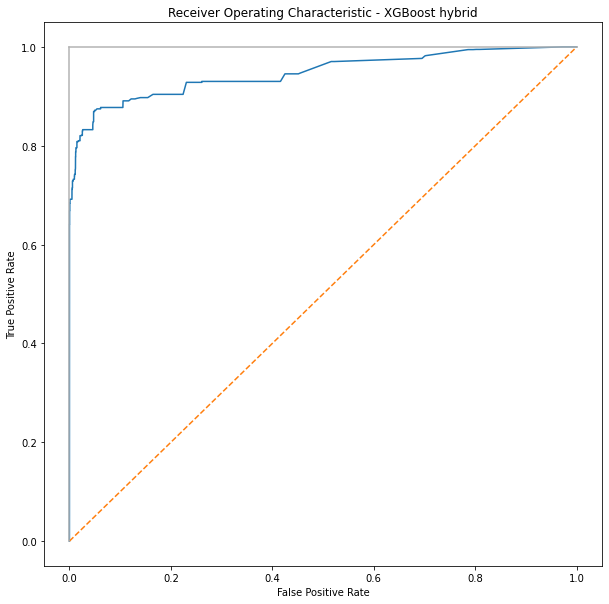

In [150]:
plt.subplots(1, figsize=(10, 10))
plt.title('Receiver Operating Characteristic - XGBoost hybrid')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0], c=".7"), plt.plot([1, 1], c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [151]:
# avg_precision

In [152]:
# from sklearn.model_selection import cross_val_score
# n_folds = 10
# scores = cross_val_score(pipeline, X_train, y_train, cv=n_folds, scoring='roc_auc', n_jobs=-1)
# fold_names = list(range(n_folds))
# fold_names.append('Average')

# avg_score = scores.mean()
# scores = list(scores)
# scores.append(avg_score)
# cv_score = pd.DataFrame({'Fold Index': fold_names, 'ROC AUC (Norm)': scores, })

# cv_score 
#do not run on local system

SVM classifier

In [153]:
# from sklearn import svm
# model = svm.SVC(random_state=random_state,verbose=True,probability=True)
# pipeline = Pipeline(steps=[('transformer', transformer), ('model', model)])
# pipeline.fit(X_train, y_train)

In [154]:
# model.classes_[1]

In [155]:
# pipeline.classes_[1]

In [156]:
# probs = model.predict_proba(X_test)[:,1]
# # Calculate average precision and area under the receiver operating characteric curve (ROC AUC)
# # Precision is the ability of the classifier not to label as positive a sample that is negative, 
# # and recall is the ability of the classifier to find all the positive samples.
# # AP summarizes a precision-recall curve as the weighted mean of precisions achieved at each threshold, 
# # with the increase in recall from the previous threshold used as the weight. 
# avg_precision = average_precision_score(y_test, probs, pos_label=1)
# # The roc_auc_score function computes the area under the receiver operating characteristic (ROC) curve, 
# # which is also denoted by AUC or AUROC. By computing the area under the roc curve, the curve information is summarized in one number.
# # A receiver operating characteristic (ROC), or simply ROC curve, is a graphical plot which illustrates the performance of 
# # a binary classifier system as its discrimination threshold is varied. It is created by plotting the fraction of true positives out 
# # of the positives (TPR = true positive rate) vs. the fraction of false positives out of the negatives (FPR = false positive rate), 
# # at various threshold settings. TPR is also known as sensitivity, and FPR is one minus the specificity or true negative rate.
# auc = roc_auc_score(y_test, probs)

In [157]:
# from sklearn import metrics
# false_positive_rate1, true_positive_rate1, threshold1 = metrics.roc_curve(y_test, probs)
# print('Accuracy Score: {}'.format(metrics.accuracy_score(y_test, probs.round())))

In [158]:
# roc_auc_score(y_test, pipeline.predict_proba(X_test)[:,1])

In [159]:
# auc


In [160]:
# plt.subplots(1, figsize=(10, 10))
# plt.title('Receiver Operating Characteristic - SVM')
# plt.plot(false_positive_rate1, true_positive_rate1)
# plt.plot([0, 1], ls="--")
# plt.plot([0, 0], [1, 0], c=".7"), plt.plot([1, 1], c=".7")
# plt.ylabel('True Positive Rate')
# plt.xlabel('False Positive Rate')
# plt.show()

In [161]:
# avg_precision

Random Forest

In [162]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100,verbose=5,
                               max_depth=max_depth,
                               min_samples_leaf=min_samples_leaf,
                               random_state=random_state)

# Pipeline fit
pipeline = Pipeline(steps=[('transformer', transformer), ('model', model)])
pipeline.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 100


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.3s remaining:    0.0s


building tree 2 of 100


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    8.8s remaining:    0.0s


building tree 3 of 100


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   13.2s remaining:    0.0s


building tree 4 of 100


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   17.7s remaining:    0.0s


building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 1

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  7.3min finished


Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['NAME_CONTRACT_TYPE_x',
                                                   'WEEKDAY_APPR_PROCESS_START_x',
                                                   'FLAG_LAST_APPL_PER_CONTRACT',
                                                   'NAME_CASH_LOAN_PURPOSE',
                                                   'NAME_CONTRACT_STATUS_x',
                                                   'NAME_PAYMENT_TYPE',
                                                   'CODE_REJECT_REASON',
                                                   'NAME_TYPE_SUITE_x',
                                                   'NAME_CL...
         

In [163]:
# probs = model.decision_path(X_test)[:,1]
probs=pipeline.predict(X_test)
# Calculate average precision and area under the receiver operating characteric curve (ROC AUC)
# Precision is the ability of the classifier not to label as positive a sample that is negative, 
# and recall is the ability of the classifier to find all the positive samples.
# AP summarizes a precision-recall curve as the weighted mean of precisions achieved at each threshold, 
# with the increase in recall from the previous threshold used as the weight. 
avg_precision = average_precision_score(y_test, probs, pos_label=1)
# The roc_auc_score function computes the area under the receiver operating characteristic (ROC) curve, 
# which is also denoted by AUC or AUROC. By computing the area under the roc curve, the curve information is summarized in one number.
# A receiver operating characteristic (ROC), or simply ROC curve, is a graphical plot which illustrates the performance of 
# a binary classifier system as its discrimination threshold is varied. It is created by plotting the fraction of true positives out 
# of the positives (TPR = true positive rate) vs. the fraction of false positives out of the negatives (FPR = false positive rate), 
# at various threshold settings. TPR is also known as sensitivity, and FPR is one minus the specificity or true negative rate.
auc = roc_auc_score(y_test, probs)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.7s finished


In [164]:
from sklearn import metrics
print('Accuracy Score: {}'.format(metrics.accuracy_score(y_test, probs.round())))

Accuracy Score: 0.9545856995930778


In [165]:
from sklearn import metrics
false_positive_rate1, true_positive_rate1, threshold1 = metrics.roc_curve(y_test, probs)
# roc_auc_score(y_test, pipeline.predict(X_test))

In [166]:
# auc

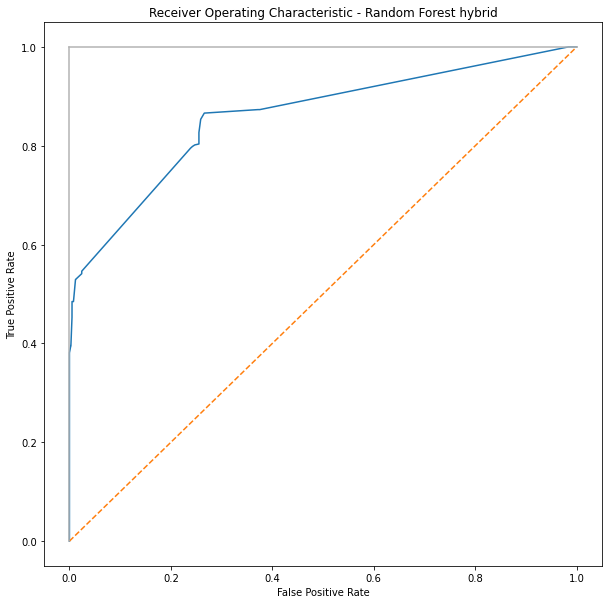

In [167]:
plt.subplots(1, figsize=(10, 10))
plt.title('Receiver Operating Characteristic - Random Forest hybrid')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0], c=".7"), plt.plot([1, 1], c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [168]:
# avg_precision

bayesian network

In [169]:
from sklearn.naive_bayes import GaussianNB,BernoulliNB 

model = BernoulliNB()
pipeline = Pipeline(steps=[('transformer', transformer), ('model', model)])
pipeline.fit(X_train, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['NAME_CONTRACT_TYPE_x',
                                                   'WEEKDAY_APPR_PROCESS_START_x',
                                                   'FLAG_LAST_APPL_PER_CONTRACT',
                                                   'NAME_CASH_LOAN_PURPOSE',
                                                   'NAME_CONTRACT_STATUS_x',
                                                   'NAME_PAYMENT_TYPE',
                                                   'CODE_REJECT_REASON',
                                                   'NAME_TYPE_SUITE_x',
                                                   'NAME_CL...
         

In [170]:
probs = pipeline.predict_proba(X_test)[:,1]
# Calculate average precision and area under the receiver operating characteric curve (ROC AUC)
# Precision is the ability of the classifier not to label as positive a sample that is negative, 
# and recall is the ability of the classifier to find all the positive samples.
# AP summarizes a precision-recall curve as the weighted mean of precisions achieved at each threshold, 
# with the increase in recall from the previous threshold used as the weight. 
avg_precision = average_precision_score(y_test, probs, pos_label=1)
# The roc_auc_score function computes the area under the receiver operating characteristic (ROC) curve, 
# which is also denoted by AUC or AUROC. By computing the area under the roc curve, the curve information is summarized in one number.
# A receiver operating characteristic (ROC), or simply ROC curve, is a graphical plot which illustrates the performance of 
# a binary classifier system as its discrimination threshold is varied. It is created by plotting the fraction of true positives out 
# of the positives (TPR = true positive rate) vs. the fraction of false positives out of the negatives (FPR = false positive rate), 
# at various threshold settings. TPR is also known as sensitivity, and FPR is one minus the specificity or true negative rate.
auc = roc_auc_score(y_test, probs)


In [171]:
from sklearn import metrics
false_positive_rate1, true_positive_rate1, threshold1 = metrics.roc_curve(y_test, probs)
print('Accuracy Score: {}'.format(metrics.accuracy_score(y_test, probs.round())))

Accuracy Score: 0.8032106604659482


In [172]:
roc_auc_score(y_test, pipeline.predict(X_test))

0.6919469274177633

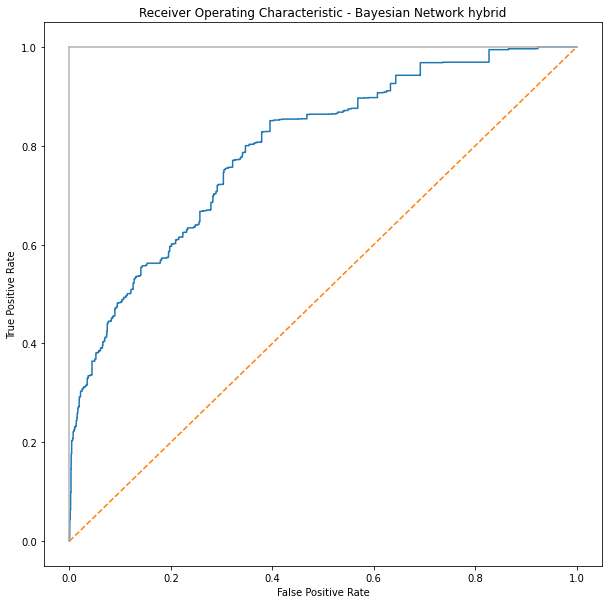

In [173]:
plt.subplots(1, figsize=(10, 10))
plt.title('Receiver Operating Characteristic - Bayesian Network hybrid')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0], c=".7"), plt.plot([1, 1], c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()